# Layers of Neural Network
- Nesse tópico é tratado das camadas, como funciona os pesos e a ativação da função, que deve ser do tipo linear para os nós de saída, contudo, não deve ser para as funções ocultas. É ensinado a calcular a fi(v) para dar o output. Nela também é mostrado como é transformar uma rede com várias camadas em uma apenas.

# Supervised Learning of a Neural Network
- Basicamente você vai entrar com um input e um output e a partir dai ir ajustando os pesos para redução do erro

# Training of a Single-Layer Neural Network: Delta Rule
- Treinamento de um neurônio de forma sistematica, é um conseito utilizado para aprendizado.
 ## O processo é contituido pelas etapas de:
 - Inicialização dos pesos 
 - Inicialização dos inputs e outputs corretos para o calculo do erro
 - Cálculo do novo peso de acordo com o erro 
 - Ajuste do novo peso 
 - É repetido o processo até que esteja em valores aceitáveis para o erro

# Generalized Delta Rule
- Trás a teoria de como é calculado o delta
- É apresentado a ativação por meio da sigmoide, que varia entre 0 e 1 e é utilizada quando a rede neural produz saídas probabilisticas

# Stochastic Gradient Descent
- Calcula o erro para cada treinamento e o ajusta imediatamente.

# Batch
- É utilizado a média das atualizações de peso para ajustar apenas uma vez durante o treinamento
- Necessita de uma grande quantidade de tempo para o treinamento


# Mini Batch
- É baseado nos dois métodos anteriores, onde é dividido os casos de testes e a partir deles se é calculado a media ponderada e atualizado. 
- Tem como vantagem ser mais rápido que o SGD e mais estável que o Batch. Por essa razão é utilizado em Deep Learning 

# Exemple Test: Implementation of the SGD Method

In [10]:
import numpy as np

def TestDeltaSGD():
    
    # Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    # Matrize de resultados
    D = np.array([[0],
                  [0],
                  [1],
                  [1]])
        
    # Inicializa um valor aleatório para o peso
    W = 2*np.random.random((1, 3)) - 1
        
    # Percorre 10.000 para ter maior precisão peso
    for _epoch in range(10000):
        
        #Taxa de aprendizado
        alpha = 0.9
        
        N = 4
        for k in range(N):
            x = X[k, :].T # Tanspoem a matriz
            d = D[k] # Coloca a matriz de resultados em d
    
            #Multiplica a matriz W (pesos) com a matriz transposta x (matriz de teste)
            v = np.matmul(W, x)
        
            #Cálculo da sigmoid
            y = 1.0 / (1.0 + np.exp(-v))
        
            #Cálculo do erro comparando o resultado com o esperado
            e = d - y
        
            #Cálculo do delta para correção do peso
            delta = y*(1-y) * e
        
            #Correção do peso
            dW = alpha*delta*x
        
            # Soma a correção com o valor do peso
            W[0][0] = W[0][0] + dW[0]
            W[0][1] = W[0][1] + dW[1]
            W[0][2] = W[0][2] + dW[2]
                
    N = 4
    # Sorteia qual será a matriz de teste
    for k in range(N):
        x = X[k,:].T #Tanspoem a matriz
        v = np.matmul(W, x) #Multiplica a matriz W com a matriz transposta x 
        y = 1.0 / (1.0 + np.exp(-v)) #Cálculo da sigmoid
        print(y) #Exibe os resultados

if __name__ == '__main__':
    TestDeltaSGD()

[0.0101999]
[0.00829533]
[0.99324097]
[0.99168617]


# Exemple Test: Implementation of the Batch Method

In [5]:
import numpy as np

def TestDeltaBatch():
    
    # Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    # Matrize de resultados
    D = np.array([[0],
                  [0],
                  [1],
                  [1]])
        
    # Inicializa um valor aleatório para o peso
    W = 2*np.random.random((1, 3)) - 1
        
    for _epoch in range(40000):
        
        #Taxa de aprendizado
        alpha = 0.9

        #Criar um array inicializado com zero
        dWsum = np.zeros(3)

        N = 4
        for k in range(N):
            x = X[k, :].T #Tanspoem a matriz
            d = D[k]      #Coloca a matriz de resultados em d

            #Multiplica a matriz W (pesos) com a matriz transposta x (matriz de teste)
            v = np.matmul(W, x)

            #Cálculo da sigmoid
            y = 1.0 / (1.0 + np.exp(-v))

            #Cálculo do erro comparando o resultado com o esperado
            e = d - y

            #Cálculo do delta para correção do peso
            delta = y*(1-y) * e

            #Correção do peso
            dW = alpha * delta * x

            #Acumula os pesos corrigidos
            dWsum = dWsum + dW

        #Faz a média dos pesos
        dWavg = dWsum / N

        #Soma a média das correções com os pesos 
        W[0][0] = W[0][0] + dWavg[0]
        W[0][1] = W[0][1] + dWavg[1]
        W[0][2] = W[0][2] + dWavg[2]
         
    N = 4
    # Sorteia qual será a matriz de teste
    for k in range(N):
        x = X[k,:].T #Tanspoem a matriz
        v = np.matmul(W, x) #Multiplica a matriz W com a matriz transposta x 
        y = 1.0 / (1.0 + np.exp(-v)) #Cálculo da sigmoid
        print(y) #Exibe os resultados
         
if __name__ == '__main__':        
    TestDeltaBatch()

[0.01020082]
[0.00829817]
[0.99323687]
[0.99168323]


- Durante esse código, o treinamento não ocorre de forma simultânea, ele acumula as atualizações e ajusta o peso apenas uma vez. Tornando assim o treinamento menos sensível aos dados utilizados. Porém, comparado com o método SGD percebe-se que a quantidade de treinamentos necessários é 4x maior utilizando o método Batch.

# Exemple Test: Implementation of the Batch and SGD Method

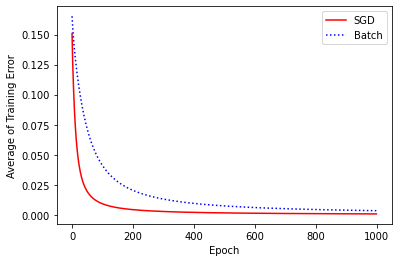

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def DeltaSGD(W, X, D):
    #Taxa de aprendizado
    alpha = 0.9

    N = 4
    for k in range(N):
        x = X[k, :].T # Tanspoem a matriz
        d = D[k] # Coloca a matriz de resultados em d

        #Multiplica a matriz W (pesos) com a matriz transposta x (matriz de teste)
        v = np.matmul(W, x)

        #Cálculo da sigmoid
        y = Sigmoid(v)

        #Cálculo do erro comparando o resultado com o esperado
        e = d - y

        #Cálculo do delta para correção do peso
        delta = y*(1-y) * e

        #Correção do peso
        dW = alpha*delta*x

        # Soma a correção com o valor do peso
        W[0][0] = W[0][0] + dW[0]
        W[0][1] = W[0][1] + dW[1]and
        W[0][2] = W[0][2] + dW[2]
    
    return W;
    
    
def DeltaBatch(W, X, D):
    #Taxa de aprendizado
    alpha = 0.9

    #Criar um array inicializado com zero
    dWsum = np.zeros(3)

    N = 4
    for k in range(N):
        x = X[k, :].T #Tanspoem a matriz
        d = D[k]      #Coloca a matriz de resultados em d

        #Multiplica a matriz W (pesos) com a matriz transposta x (matriz de teste)
        v = np.matmul(W, x)

        #Cálculo da sigmoid
        y = Sigmoid(v)

        #Cálculo do erro comparando o resultado com o esperado
        e = d - y

        #Cálculo do delta para correção do peso
        delta = y*(1-y) * e

        #Correção do peso
        dW = alpha * delta * x

        #Acumula os pesos corrigidos
        dWsum = dWsum + dW

    #Faz a média dos pesos
    dWavg = dWsum / N

    #Soma a média das correções com os pesos 
    W[0][0] = W[0][0] + dWavg[0]
    W[0][1] = W[0][1] + dWavg[1]
    W[0][2] = W[0][2] + dWavg[2]
    
    return W;
    
    
    
def SGDvsBatch():
    
    # Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])

    # Matrize de resultados
    D = np.array([[0],
                  [0],
                  [1],
                  [1]])

    #Criar um array inicializado com zero
    E1 = np.zeros(1000)
    E2 = np.zeros(1000)

    #Inicializa um valor aleatório para o peso
    W1 = 2*np.random.random((1, 3)) - 1
    W2 = np.array(W1)

    for epoch in range(1000):
        W1 = DeltaSGD(W1, X, D)   #Chama a função DeltaSGD
        W2 = DeltaBatch(W2, X, D) #Chama a função DeltaBatch

        #Inicializa as variáveis
        es1 = 0
        es2 = 0
        N   = 4
        for k in range(N):
            x = X[k, :].T #Tanspoem a matriz
            d = D[k]      #Coloca a matriz de resultados em d
 
            v1 = np.matmul(W1, x)   #Multiplica a matriz W1 (pesos) com a matriz transposta x (matriz de teste)
            y1 = Sigmoid(v1)        #Cálculo da sigmoid
            es1 = es1 + (d - y1)**2 #Cálculo do erro da função SGD

            v2 = np.matmul(W2, x)   #Multiplica a matriz W2 (pesos) com a matriz transposta x (matriz de teste)
            y2 = Sigmoid(v2)        #Cálculo da sigmoid
            es2 = es2 + (d - y2)**2 #Cálculo do erro da função Batch

        #Cálculo da média do erro pelo tempo
        E1[epoch] = es1/N 
        E2[epoch] = es2/N

    #Plota os dados da funções
    SGD,   = plt.plot(E1, 'r')
    Batch, = plt.plot(E2, 'b:')
    plt.xlabel("Epoch")
    plt.ylabel("Average of Training Error")
    plt.legend([SGD, Batch], ['SGD', 'Batch'])
    plt.show()

if __name__ == '__main__':        
    SGDvsBatch()

# Exemple Test: Implementation of the Xor Method

In [12]:
import numpy as np

def TestDeltaXOR():
    
    #Matrizes de testes
    X = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])
    
    #Matrize de resultados
    D = np.array([[0],
                  [1],
                  [1],
                  [0]])
    
    #Inicializa um valor aleatório para o peso
    W = 2*np.random.random((1, 3)) - 1
    
    #Treino
    for _epoch in range(40000):
        alpha = 0.9
    
        N = 4
        for k in range(N):
            x = X[k,:].T #Tanspoem a matriz
            d = D[k] #Coloca a matriz de resultados em d
            
            #Multiplica a matriz W (pesos) com a matriz transposta x (matriz de teste)
            v = np.matmul(W, x)
            
            #Cálculo da sigmoid
            y = 1.0 / (1.0 + np.exp(-v))

            #Cálculo do erro comparando o resultado com o esperado
            e = d - y
            
            #Cálculo do delta para correção do peso
            delta = y*(1-y) * e

            #Correção do peso
            dW = alpha*delta*x

            #Soma a correção com o valor do peso
            W[0][0] = W[0][0] + dW[0]
            W[0][1] = W[0][1] + dW[1]
            W[0][2] = W[0][2] + dW[2]
        
    N = 4
    #Inferência
    for k in range(N):              
        x = X[k,:].T #Tanspoem a matriz
        v = np.matmul(W, x) #Multiplica a matriz W (pesos) com a matriz transposta x (matriz de teste)
        y = 1.0 / (1.0 + np.exp(-v)) #Cálculo da sigmoid
        print(y) #Exibe os resultados

if __name__ == '__main__':
    TestDeltaXOR()

[0.52965337]
[0.5]
[0.47034663]
[0.44090112]


- No caso dessa região, não conseguimos dividir em uma linha reta as regiões. Por isso as saídas não são as esperadas, mas sim uma linha que divide a região em duas partes.

- Nesse caso vemos que uma única camada pode resolver apenas problemas lineares que são separáveis.